In [0]:
# import neceessary packages 
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

#METHOD #1:OpenCV, Numpy and urllib
def url_to_image(url):
  # download the image, convert it to a Numpy array, and then read
  # it into OpenCV format
  resp = urlopen(url)
  image = np.asarray(bytearray(resp.read()),dtype="uint8")
  #
  #print(image[0])
  image=cv2.imdecode(image, cv2.IMREAD_COLOR)
  #print(image.dtype)
  
  #image=cv2.normalize(image, image, 0, 255, cv2.NORM_MINMAX)
  
  # return this image
  return image

In [0]:
image1 = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")
image= url_to_image("https://raw.githubusercontent.com/ravindrabharathi/eip3/master/images/test2.png")

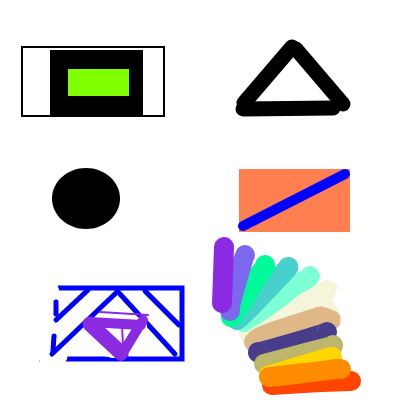

In [0]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

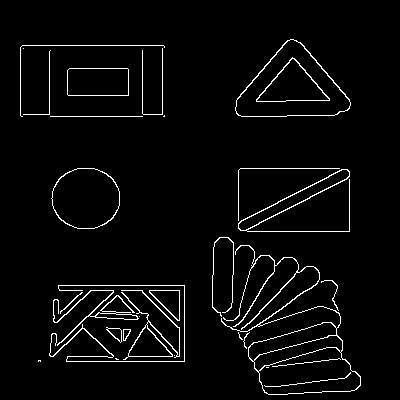

In [0]:
cv2_imshow(edges)

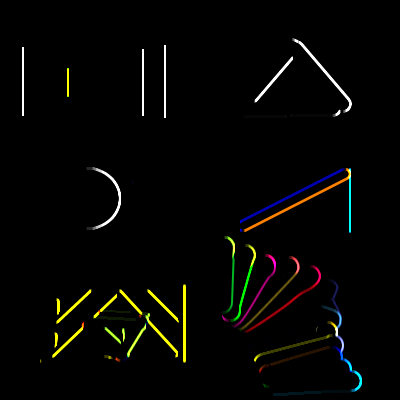

In [0]:
#vertical edge detector 
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])  #detect vertical edge when transition dark to light pixels
#kernel2 = np.float32([[1,0,-1],[1,0,-1],[1,0,-1]]) #detect vertical edge when transition from light to dark pixels  

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

#dst2 = cv2.filter2D(image,-1,kernel2)
#cv2_imshow(dst2)





##Horizontal Edge detection 
For detecting Horizontal edges we can use a Sobel filter like below. 

To detect horizontal edges transitioning from dark to light pixels :
$$
    \begin{bmatrix}
    -1 & -2 & -1 \\
    0 & 0 & 0 \\
    1 & 2 & 1 \\
    \end{bmatrix}
$$

To detect horizontal edges transitioning from light to dark pixels :
$$
    \begin{bmatrix}
    1 & 2 & 1 \\
    0 & 0 & 0 \\
    -1 & -2 & -1 \\
    \end{bmatrix}
$$

Edges detected when transitioning from dark to light pixels :



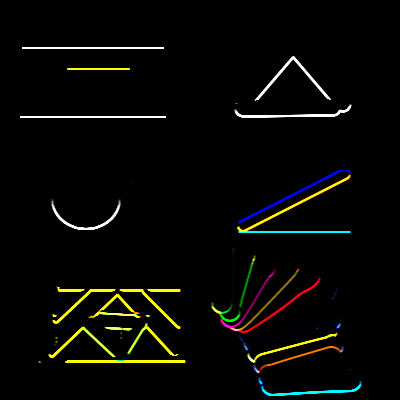


Edges detected when transitioning from light to dark pixels :



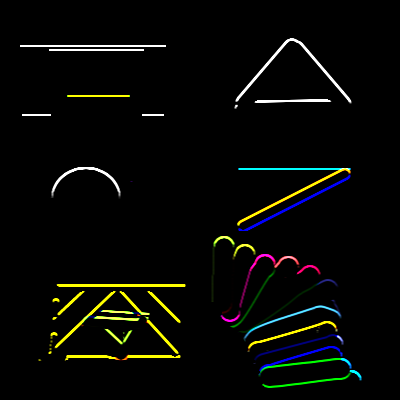

In [0]:
#horizontal edge detector
kernel = np.float32([[-1,-2,-1],[0,0,0],[1,2,1]]) # transition from dark to light pixel values 
kernel2 = np.float32([[1,2,1],[0,0,0],[-1,-2,-1]])  # transition from light to dark pixel values 
dst_h = cv2.filter2D(image,-1,kernel)
dst_h2 = cv2.filter2D(image,-1,kernel2)
print("Edges detected when transitioning from dark to light pixels :\n")
cv2_imshow(dst_h)
print("\nEdges detected when transitioning from light to dark pixels :\n")
cv2_imshow(dst_h2)

##45 degree Diagonal Edge detection

A diagonal edge detection filter can be of the following forms :

Prewitt filter :
$$
    \begin{bmatrix}
    0 & 1 & 1 \\
   -1 & 0 & 1 \\
    -1 & -1 & 0 \\
    \end{bmatrix}
$$

or 

$$
    \begin{bmatrix}
    -1 & -1 & 0 \\
   -1 & 0 & 1 \\
    0 & 1 & 1 \\
    \end{bmatrix}
$$


Sobel filter :
$$
    \begin{bmatrix}
    0 & 1 & 2 \\
   -1 & 0 & 1 \\
    -2 & -1 & 0 \\
    \end{bmatrix}
$$

or 

$$
    \begin{bmatrix}
    -2 & -1 & 0 \\
   -1 & 0 & 1 \\
    0 & 1 & 2 \\
    \end{bmatrix}
$$


Diagonal edges detected using Prewitt filter :



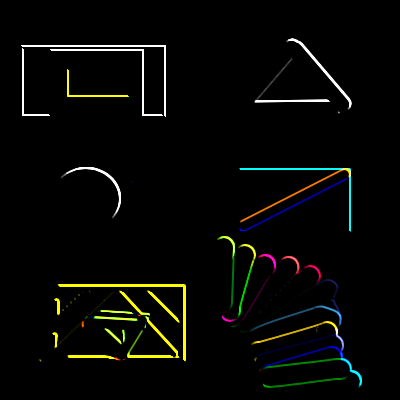

In [0]:

kernel = np.float32([[0,1,1],[-1,0,1],[-1,-1,0]]) # 45 degree edge detection Prewitt filter 

dst_d = cv2.filter2D(image,-1,kernel)
print('Diagonal edges detected using Prewitt filter :\n')
cv2_imshow(dst_d)

Diagonal edges detected using Sobel filter :



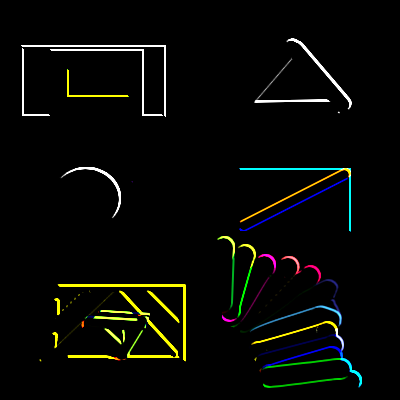

In [0]:

kernel = np.float32([[0,1,2],[-1,0,1],[-2,-1,0]]) # 45 degrees edge Sobel filter : direction \\ descending from left to right \\

dst_d3 = cv2.filter2D(image,-1,kernel)
print('Diagonal edges detected using Sobel filter :\n')
cv2_imshow(dst_d3)

diagonal edges when transitioning from dark to light pixels 


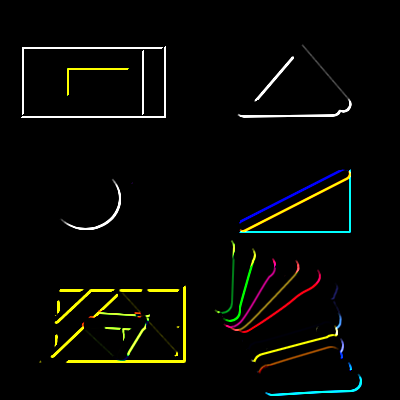

In [0]:
# prewitt filter for diagonal edges when transitioning from dark to light pixels and  // descending from right to left //
kernel = np.float32([[-1,-1,0],[-1,0,1],[0,1,1]]) 

dst_d2 = cv2.filter2D(image,-1,kernel)
print("diagonal edges when transitioning from dark to light pixels ")
cv2_imshow(dst_d2)

##Blur filter : 
for blurring an image,  we can use a box blur filter or box linear filter 

$$
    \begin{bmatrix}
    1/9 & 1/9 & 1/9 \\
   1/9 & 1/9 & 1/9 \\
    1/9 & 1/9 & 1/9 \\
    \end{bmatrix}
$$

We can also use Gaussian Blur 

Image blurred using box blur filter :



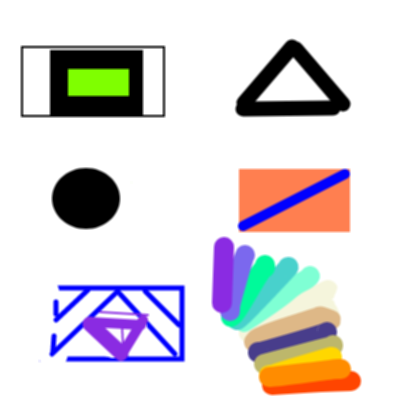

In [0]:

kernel = np.float32([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])  #blur filter : box blur 

dst_blur = cv2.filter2D(image,-1,kernel)

print("Image blurred using box blur filter :\n")
cv2_imshow(dst_blur)


##Sharpen filter 
To sharpen images we can apply the following filter 
$$
    \begin{bmatrix}
    0 & -1 & 0 \\
   -1 & 5 & -1 \\
    0 & -1 & 0 \\
    \end{bmatrix}
$$

Sharpened image :


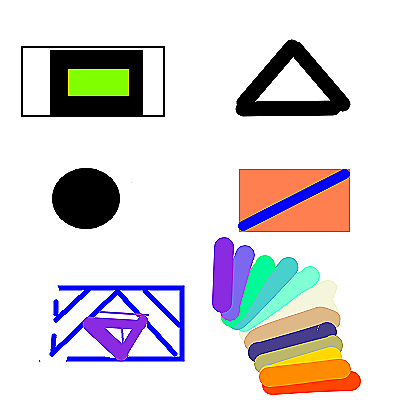

In [0]:

kernel = np.float32([[0,-1,0],[-1,5,-1],[0,-1,0]])  # sharpen filter 

dst_sharpen = cv2.filter2D(image,-1,kernel)
print('Sharpened image : ')
cv2_imshow(dst_sharpen)


##Identity filter 
An identity filter is one which leaves the pixel values of original image unchanged . A 3x3 identity filter looks like below :

$$
    \begin{bmatrix}
    0 & 0 & 0 \\
   0 & 1 & 0 \\
    0 & 0 & 0 \\
    \end{bmatrix}
$$

One thing to note is what happens at the edges. Since the edges have lesser surrounding pixels compared to the inner ones , padding may be used to get back the original pixel  

Image after applying identity filter :



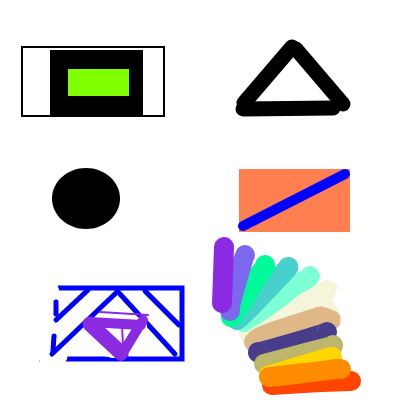

check if pixel values of source image and the output image are the same : 


True

In [0]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[0,0,0],[0,1,0],[0,0,0]]) #identity filter

dst_identity = cv2.filter2D(image,-1,kernel)
print("Image after applying identity filter :\n")
cv2_imshow(dst_identity)

print("check if pixel values of source image and the output image are the same : ")
((dst_identity == image).all())